In [ ]:
#UPDATE this cell with your data source + Dictionary/Codebook
#data source: https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html
#data dictionary: https://www2.census.gov/programs-surveys/cps/datasets/2021/march/asec2021_ddl_pub_full.pdf

In [1]:
#import necessary libaries
import pandas as pd
import matplotlib

In [2]:
#name file path (you will have download your own dataset and populate the path and choose the appropriate cell to execute)
file = 'ffpub21.csv' # <-- edit this value! 

In [3]:
#you will run just ONE of the next four code blocks, depending on the file type of your dataset

In [4]:
#read data from CSV (.csv) & print head
df = pd.read_csv('ffpub21.csv')
print(df.head())

   FPOVCUT  FPERSONS  FHEADIDX  FSPOUIDX  FOWNU6  FRELU6  FKIND  FKINDEX  \
0    20244         3         1         2       0       0      1        1   
1    20244         3         1         2       0       0      1        1   
2    12413         1         1         0       0       0      2        3   
3    17839         2         1         0       0       0      2        3   
4    13465         1         3         0       0       0      3        4   

   FTYPE  FRELU18  ...  F_MV_SL  I_FHIPVAL  I_FHIPVAL2  I_FMEDVAL  I_FMOOP  \
0      1        0  ...        0          1           1          0        1   
1      1        0  ...        0          0           0          0        0   
2      2        0  ...        0          1           1          0        1   
3      1        1  ...      105          0           0          0        0   
4      5        0  ...        0          0           0          0        0   

   I_FMOOP2  I_FOTCVAL  POVLL  FILEDATE  YYYYMM  
0         1          0  

In [ ]:
#read data from SAS (.sas7bdat or .sas) & print head
df = pd.read_sas(file)
print(df.head())

In [ ]:
#read data from excel (.xls or .xlsx) & print head
df = pd.read_excel(file)
print(df.head())

In [ ]:
#read data from Stata (.dta) & print head
df = pd.read_excel(file)
print(df.head())

In [ ]:
#list columns in data frame
print(list(df))
print(len(df))

In [6]:
#output frequency table of chosen column in dataset
col = 'FKINDEX' #<-edit this value! column name as it appears in dataframe
col_name = 'Kind Of Family Expanded' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

   Kind Of Family Expanded   freq
0                        1  31976
3                        2    330
2                        3  17439
1                        4  23406


In [7]:
#replace codes with descriptive labels
#if your dataframe already has descriptive labels, you don't need to run this cell
codebook = [['1', 'Opposite-sex married couple family'], #<- if appropriate, replace these values based on codebook or data dictionary for your dataset
            ['2', 'Same-sex married couple family'], 
            ['3', 'Male reference person'], 
            ['4', 'Female reference person'], ]
#loops through label codes and replaces them in frequency table
for lbl in codebook:
    #use line below if codes are stored as integers
    freq[col_name] = freq[col_name].replace(int(lbl[0]), lbl[1])
    #use line below if codes are stored as strings
    #freq[col_name] = freq[col_name].replace(lbl[0], lbl[1])
#prints updated frequency table
print(freq)

              Kind Of Family Expanded   freq
0  Opposite-sex married couple family  31976
3      Same-sex married couple family    330
2               Male reference person  17439
1             Female reference person  23406


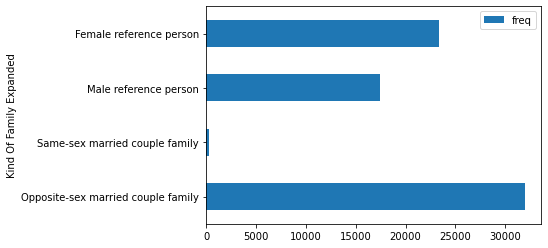

In [8]:
#create frequency chart
ax = freq.plot.barh(x=col_name, y='freq', rot=0)